<a href="https://colab.research.google.com/github/blakzaei/Visualize-Filters-and-Feature-Maps/blob/master/Visualize_Filters_and_FeatureMaps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
##-- Imports -------------------------------------------------------------------
from keras.applications.vgg19 import VGG19
from keras.applications.vgg19 import preprocess_input
from keras.utils import load_img
from keras.utils import img_to_array
from keras.models import Model

from matplotlib import pyplot as plt
from numpy import expand_dims
import math


In [ ]:
##-- Create Model --------------------------------------------------------------
model = VGG19()
model.summary()

In [5]:
#-- Number of All Layers -------------------------------------------------------
n_layers = len(model.layers)
print('Number of Layers= %d' % n_layers)

Number of Layers= 26


In [6]:
#-- Conv Layers ----------------------------------------------------------------
n_conv_layers = 0
index = 0

#-- key: conv_number : value:index --
conv_layers_index = {} 

for layer in model.layers:
  if 'conv' in layer.name:  
    n_conv_layers +=1  
    conv_layers_index[n_conv_layers] = index 

    filters, biases = layer.get_weights()
    print(n_conv_layers , layer.name, filters.shape)
  
  index += 1

print('\nNumber of Conv Layers= %d' % n_conv_layers)
print('\nConv Layers Index:\n' , conv_layers_index)

1 block1_conv1 (3, 3, 3, 64)
2 block1_conv2 (3, 3, 64, 64)
3 block2_conv1 (3, 3, 64, 128)
4 block2_conv2 (3, 3, 128, 128)
5 block3_conv1 (3, 3, 128, 256)
6 block3_conv2 (3, 3, 256, 256)
7 block3_conv3 (3, 3, 256, 256)
8 block3_conv4 (3, 3, 256, 256)
9 block4_conv1 (3, 3, 256, 512)
10 block4_conv2 (3, 3, 512, 512)
11 block4_conv3 (3, 3, 512, 512)
12 block4_conv4 (3, 3, 512, 512)
13 block5_conv1 (3, 3, 512, 512)
14 block5_conv2 (3, 3, 512, 512)
15 block5_conv3 (3, 3, 512, 512)
16 block5_conv4 (3, 3, 512, 512)

Number of Conv Layers= 16

Conv Layers Index:
 {1: 1, 2: 2, 3: 4, 4: 5, 5: 7, 6: 8, 7: 9, 8: 10, 9: 12, 10: 13, 11: 14, 12: 15, 13: 17, 14: 18, 15: 19, 16: 20}


In [7]:
#-- Select Con Layer to Visualize ----------------------------------------------
conv_layer_index = int(input('Which Conv Layer do you want to visualize (1,%d)?' %n_conv_layers))

if conv_layer_index not in range(1,n_conv_layers+1):
  print('Please Enter a value between 1 and %d' %n_conv_layers)

Which Conv Layer do you want to visualize (1,16)?2


In [9]:
#-- Select Number of Filters and Channels to Visualize -------------------------
layer_index = conv_layers_index[conv_layer_index]
print('Selected Layer: %s'  %model.layers[layer_index].name)

filters, biases = model.layers[layer_index].get_weights()

number_of_filters = filters.shape[3]
print('Number of Filters = %d' %number_of_filters)

number_of_channels = filters.shape[2]
print('Number of Channels = %d' %number_of_channels)

number_of_filters_to_visualize = int(input('How many filters do you want to visualize (1,%d)?' %number_of_filters))

if number_of_filters_to_visualize not in range(1,number_of_filters+1):
  print('Please Enter a value between 1 and %d' %number_of_filters)


number_of_channels_to_visualize = int(input('How many channels do you want to visualize (1,%d)?' %number_of_channels))

if number_of_channels_to_visualize not in range(1,number_of_channels+1):
  print('Please Enver a value between 1 and %d' %number_of_channels)


Selected Layer: block1_conv2
Number of Filters = 64
Number of Channels = 64
How many filters do you want to visualize (1,64)?5
How many channels do you want to visualize (1,64)?4


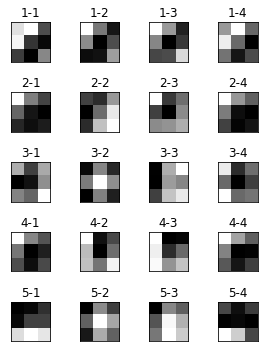

In [10]:
#-- Plot Filters ---------------------------------------------------------------

#-- Normalize Values to the Range 0-1 --
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters, ix = number_of_filters_to_visualize, 1
n_channels = number_of_channels_to_visualize

#-- Set Figure Size --
fig = plt.figure(figsize=(n_channels,n_filters ))

for i in range(n_filters):
  #-- Get the Filter --
  f = filters[:, :, :, i]

  #-- Plot Each Channel Separately --
  for j in range(n_channels):

    #-- Specify Subplot and Turn of Axis --    
    ax = plt.subplot(n_filters, n_channels, ix)
    ax.set_xticks([]) 
    ax.set_yticks([])

    #-- Set Title: Channle#-Filter# --
    ax.set_title(str(i+1) + '-' + str(j+1))

    #-- Plot Filter Channel in Grayscale --
    plt.imshow(f[:, :, j], cmap='gray') 
    ix += 1


plt.tight_layout()
plt.show()

In [11]:
#-- Output Size of Layers ------------------------------------------------------
index = 1
for layer in model.layers:
  if 'conv' not in layer.name:
    continue
    
  print(index , layer.name, layer.output.shape)
  
  index +=1

1 block1_conv1 (None, 224, 224, 64)
2 block1_conv2 (None, 224, 224, 64)
3 block2_conv1 (None, 112, 112, 128)
4 block2_conv2 (None, 112, 112, 128)
5 block3_conv1 (None, 56, 56, 256)
6 block3_conv2 (None, 56, 56, 256)
7 block3_conv3 (None, 56, 56, 256)
8 block3_conv4 (None, 56, 56, 256)
9 block4_conv1 (None, 28, 28, 512)
10 block4_conv2 (None, 28, 28, 512)
11 block4_conv3 (None, 28, 28, 512)
12 block4_conv4 (None, 28, 28, 512)
13 block5_conv1 (None, 14, 14, 512)
14 block5_conv2 (None, 14, 14, 512)
15 block5_conv3 (None, 14, 14, 512)
16 block5_conv4 (None, 14, 14, 512)


In [12]:
#-- Select Conv Layer to Visualize Feature Maps --------------------------------
conv_layer_index = int(input('Which Layer do you want to visualize Feature Maps (1,%d)?' %n_conv_layers))

if conv_layer_index not in range(1,n_conv_layers+1):
  print('Please Enter a value between 1 and %d' %n_conv_layers)

Which Layer do you want to visualize Feature Maps (1,16)?2


In [13]:
#-- Create a Sub-Model ---------------------------------------------------------
layer_index = conv_layers_index[conv_layer_index]
print(model.layers[layer_index].name)

#-- Redefine Model to Output Right After the Selected Layer
refined_model = Model(inputs=model.inputs, outputs=model.layers[layer_index].output)

refined_model.summary()

block1_conv2
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


In [15]:
#-- Load Image to Visualize ----------------------------------------------------
input_size = refined_model.layers[0].input.shape
img_size = (input_size[1] , input_size[2])

#-- Load the Image with the Required Shape --
img = load_img('bird.jpg', target_size=img_size)

In [16]:
#-- Conver Image to an Array, Expand it and Preprocess -------------------------

#-- Convert the Image to an Array --
img = img_to_array(img)

#-- Expand Dimensions so that it Represents a Single 'sample' --
img = expand_dims(img, axis=0)

#-- Prepare the Image (e.g. scale pixel values for the vgg) --
img = preprocess_input(img)

In [17]:
#-- Get Feature Maps -----------------------------------------------------------

#-- Get Feature Map for Selected Layer --
feature_maps = refined_model.predict(img)

#-- Show output Size --
print(feature_maps.shape)

1/1 [==============================] - 1s 894ms/step
(1, 224, 224, 64)


In [18]:
#-- Select Feature Maps to Visialize -------------------------------------------
number_of_feature_maps = feature_maps.shape[3]
print('Number of Feature Maps = %d' %number_of_feature_maps)

number_of_feature_maps_to_visualize = int(input('How many feature maps do you want to visualize (1,%d)?' %number_of_feature_maps))

if number_of_feature_maps_to_visualize not in range(1,number_of_feature_maps+1):
  print('Please Enter a value between 1 and %d' %number_of_feature_maps)

Number of Feature Maps = 64
How many feature maps do you want to visualize (1,64)?20


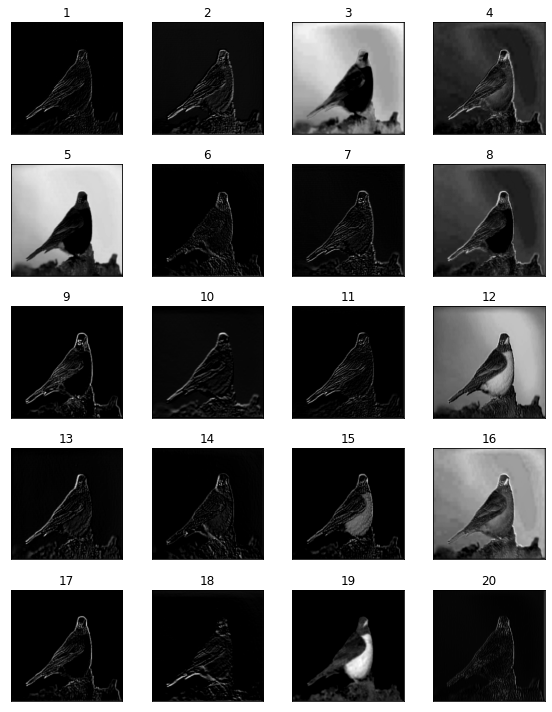

In [19]:
#-- Visualize Selected Feature Maps --------------------------------------------

#-- Set size of Figure --
h = int(math.sqrt(number_of_feature_maps_to_visualize))
w = math.ceil(number_of_feature_maps_to_visualize/h)
fig = plt.figure(figsize=(h*2,w*2 ))

ix = 1
for _ in range(w):
  for _ in range(h):

    #-- Specify Subplot And Turn of Axis --
    ax = plt.subplot(w, h, ix)
    ax.set_xticks([])
    ax.set_yticks([])

    #-- Set Title: feature_map# --
    ax.set_title(ix)

		#-- Plot Feature Maps --
    plt.imshow(feature_maps[0, :, :, ix-1], cmap='gray')

    ix += 1
    if ix>number_of_feature_maps_to_visualize:
      break

plt.tight_layout()
plt.show()

In [20]:
#-- Show Conv Layers index -----------------------------------------------------
n_conv_layers = 0
index = 0

#-- key: conv_number : value:index --
conv_layers_index = {} 

for layer in model.layers:
  if 'conv' in layer.name:  
    n_conv_layers +=1      
    filters, biases = layer.get_weights()
    print(index , n_conv_layers , layer.name, filters.shape)
  
  index += 1


1 1 block1_conv1 (3, 3, 3, 64)
2 2 block1_conv2 (3, 3, 64, 64)
4 3 block2_conv1 (3, 3, 64, 128)
5 4 block2_conv2 (3, 3, 128, 128)
7 5 block3_conv1 (3, 3, 128, 256)
8 6 block3_conv2 (3, 3, 256, 256)
9 7 block3_conv3 (3, 3, 256, 256)
10 8 block3_conv4 (3, 3, 256, 256)
12 9 block4_conv1 (3, 3, 256, 512)
13 10 block4_conv2 (3, 3, 512, 512)
14 11 block4_conv3 (3, 3, 512, 512)
15 12 block4_conv4 (3, 3, 512, 512)
17 13 block5_conv1 (3, 3, 512, 512)
18 14 block5_conv2 (3, 3, 512, 512)
19 15 block5_conv3 (3, 3, 512, 512)
20 16 block5_conv4 (3, 3, 512, 512)


In [21]:
#-- Redefine Model -------------------------------------------------------------
ixs = [2, 5, 10, 15, 20]
outputs = [model.layers[i].output for i in ixs]
refined_model = Model(inputs=model.inputs, outputs=outputs)

refined_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [22]:
#-- Get Feture Maps for All Blocks ---------------------------------------------

#-- Load the Image --
img = load_img('bird.jpg', target_size=(224, 224))

#-- Convert the Image to an Array --
img = img_to_array(img)

#-- Expand Dimensions --
img = expand_dims(img, axis=0)

#-- Prepare the Image --
img = preprocess_input(img)

#-- Get Feature Maps --
feature_maps = refined_model.predict(img)




1/1 [==============================] - 1s 950ms/step


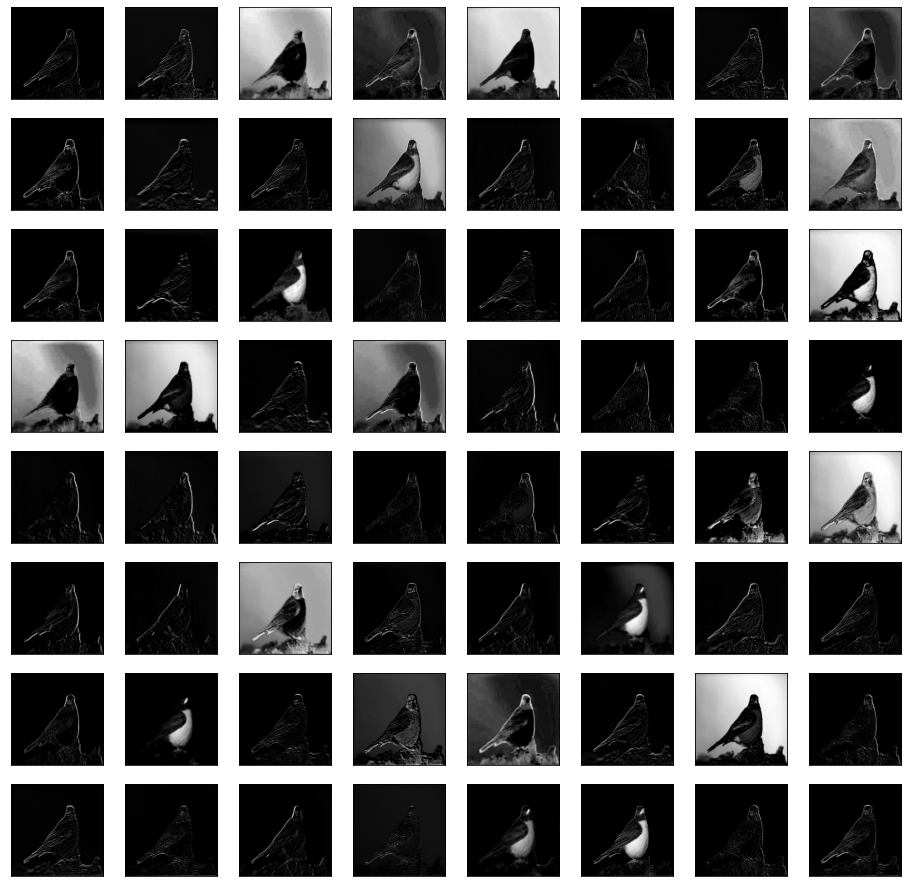

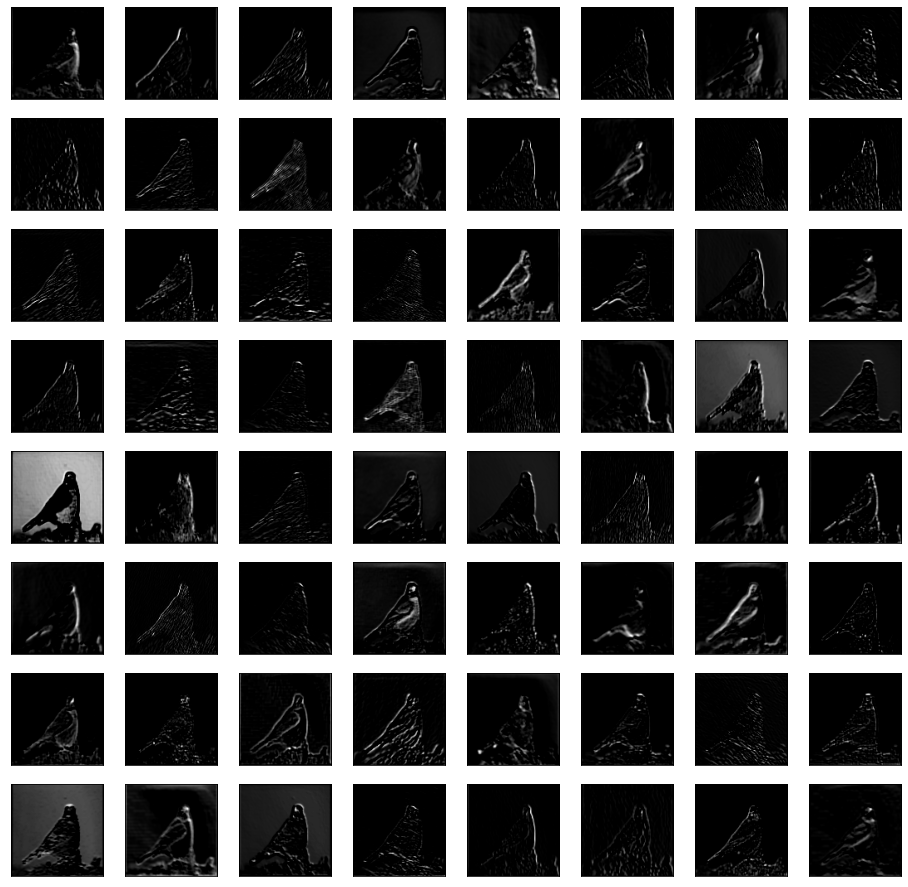

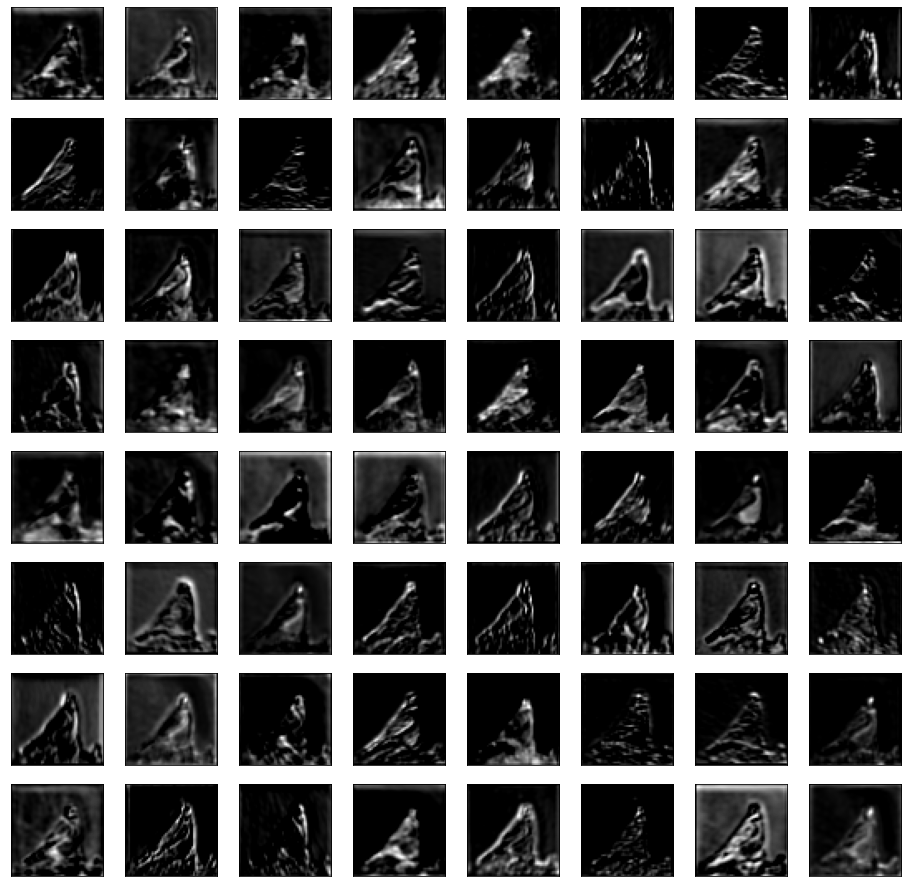

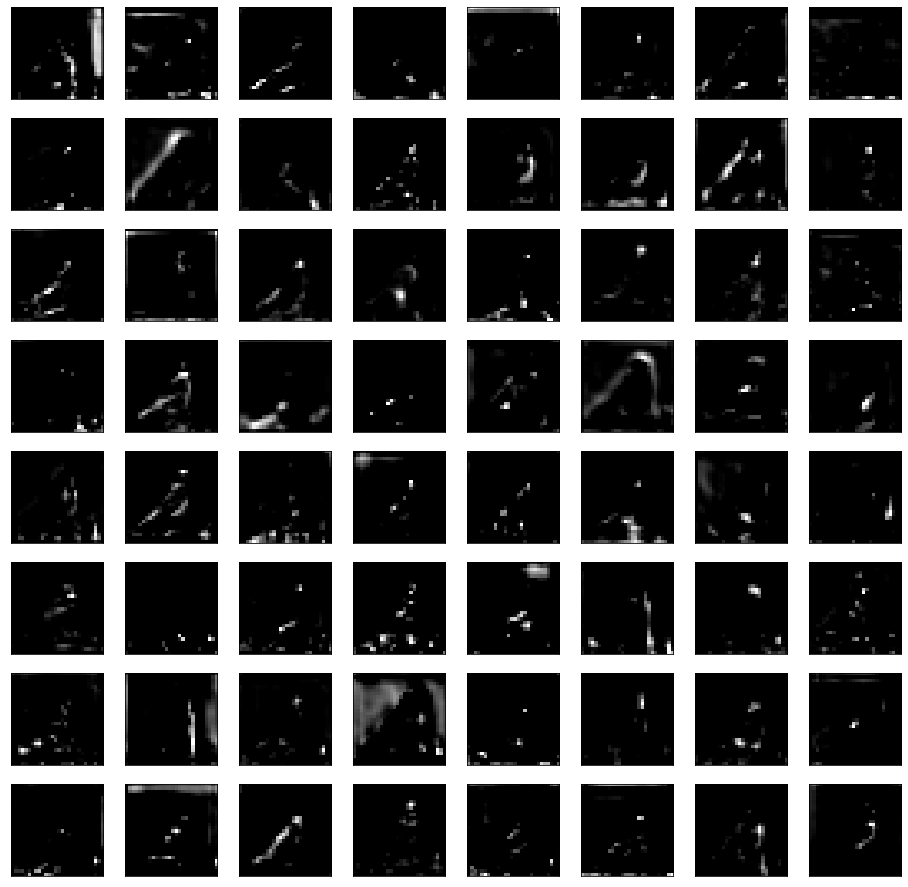

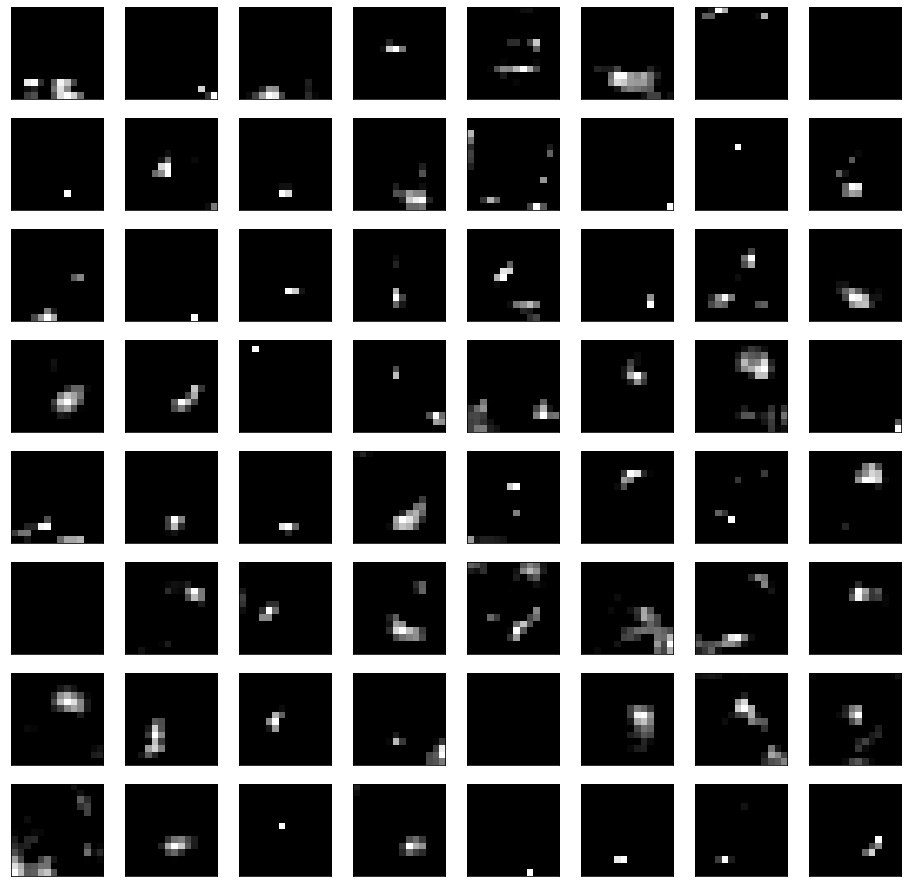

In [23]:
#--Plot Feture Maps for All Blocks ---------------------------------------------
square = 8

for fmap in feature_maps:
  print("=====================================================================")
  fig = plt.figure(figsize=(square*2 , square*2 ))
  #-- Plot 64 Maps in an 8x8 Squares
  ix = 1
  for _ in range(square):
    for _ in range(square):
      #-- Specify Subplot and Turn of Axis
      ax = plt.subplot(square, square, ix)
      ax.set_xticks([])
      ax.set_yticks([])
			#-- Plot Filter Channel in Grayscale
      plt.imshow(fmap[0, :, :, ix-1], cmap='gray')
      ix += 1
	# show the figure
  plt.show()
  print("=====================================================================")